# Reconstruction Demo script/ Plots

This is a simple implementation of FBP.

1. for horizontal line in stack of projections X
   1. reconstruct (perform inverse radon transform)
2. z-stack and view
   1. slider to view position in stack


In [2]:
from skimage.transform import iradon
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from tqdm import tqdm

Load data in, expect the shape to be in (angles, length, width)

In [5]:
# PATH_TO_IMAGE =  '../data_store/spin_3/MMStack_Pos0.ome.tif'
# PATH_TO_IMAGE =  '../data_store/aligned.tif'
# PATH_TO_IMAGE =  '../data_store/2022-10-10_1433_testrecon/2022-10-10_1433_testrecon_result.tif'
PATH_TO_IMAGE = '../../../OPT Shared files/1_Data/2022-12-01 broken phantom/1_1/1_1_MMStack_Pos0.ome.tif'
im = io.imread(PATH_TO_IMAGE)

print(im.shape)

(400, 1392, 1040)


Text(0.5, 1.0, 'First projection image')

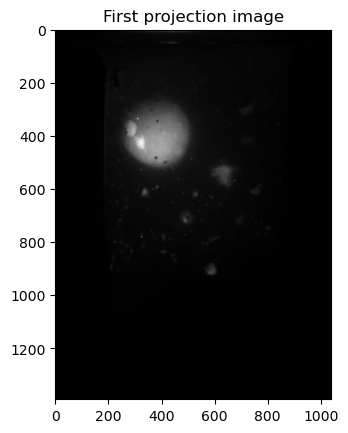

In [13]:
plt.imshow(im[0], cmap='gray')
plt.title('First projection image')

Generate list of angles for which the sample is expected to rotate

In [17]:
# The last datapoint is excluded 
theta = np.linspace(0, 360, np.shape(im)[0], endpoint=False)

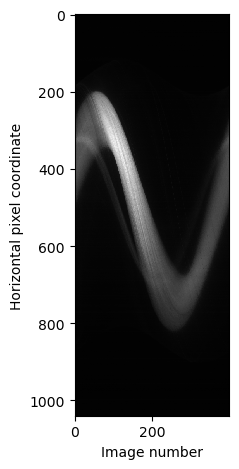

In [18]:
# Convert image stack to sinograms
# Want shape (length, width, angles)
sinogram = np.moveaxis(im, 0, -1)
%matplotlib inline
# Display the sinogram for the first row of pixels
plt.ylabel('Horizontal pixel coordinate')
plt.xlabel('Image number')
io.imshow(sinogram[450])


In [46]:
# Reconstruct single slice
reconstruction_fbp = iradon(sinogram[420]-400, filter_name='ramp', theta=theta, circle=True)

(-0.5, 1039.5, 1039.5, -0.5)

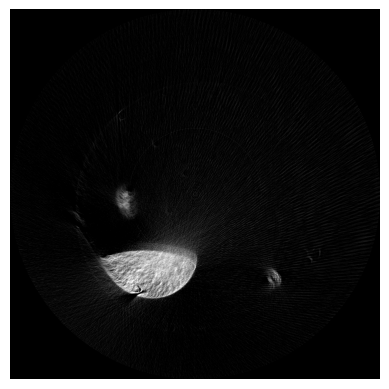

In [60]:
thresholded = reconstruction_fbp.copy()
thresholded[thresholded < 1] = 0
thresholded[thresholded > 200] = 200
plt.imshow(thresholded, cmap='gray')
# plt.colorbar()
plt.axis('off')

In [19]:
# Reconstruct dataset here
reconstruction_fbp = np.zeros((im.shape[1], im.shape[2], im.shape[2]))
for i in tqdm(range(im.shape[1])):
    reconstruction_fbp[i] = iradon(sinogram[i], theta=theta, filter_name='ramp')

  0%|          | 2/1392 [00:06<1:19:31,  3.43s/it]


KeyboardInterrupt: 

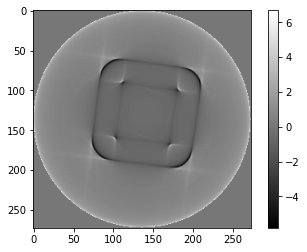

In [7]:
# plt.imshow(reconstruction_fbp[2], cmap='gray')
# plt.colorbar()

In [8]:
# from matplotlib.widgets import Slider, Button
# %matplotlib 

Using matplotlib backend: MacOSX


In [12]:
# The parametrized function to be plotted
# def f(index):
#     return reconstruction_fbp[index]

# max_index = im.shape[1]
# allowed_indices = np.arange(0, max_index)

# # Define initial parameters
# init_index = 0

# # Create the figure and the line that we will manipulate
# fig, ax = plt.subplots()
# display = ax.imshow(f(init_index), cmap='gray')
# ax.set_xlabel('lateral coordinate')
# ax.set_ylabel('axial coordinate')

# # adjust the main plot to make room for the sliders
# fig.subplots_adjust(bottom=0.25)

# # # Make a horizontal slider to control the frequency.
# ax_index = fig.add_axes([0.2, 0.1, 0.65, 0.03])
# index_slider = Slider(
#     ax=ax_index,
#     label='Stack index',
#     valmin=0,
#     valmax= max_index,
#     valstep = allowed_indices,
#     valinit=init_index,
# )

# # The function to be called anytime a slider's value changes
# def update(val):
#     display = ax.imshow(f(index_slider.val), cmap='gray')
#     # ax.(f(t, amp_slider.val, freq_slider.val))
#     fig.canvas.draw_idle()


# # register the update function with each slider
# index_slider.on_changed(update)
# # amp_slider.on_changed(update)

# # # Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
# # resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
# # button = Button(resetax, 'Reset', hovercolor='0.975')


# # def reset(event):
# #     freq_slider.reset()
# #     amp_slider.reset()
# # button.on_clicked(reset)

# plt.show()

In [36]:
# Save reconstructed dataset as pickle file
# import pickle
# with open('20221010_embryo.pkl', 'wb') as handle:
#     pickle.dump(reconstruction_fbp, handle, protocol=pickle.HIGHEST_PROTOCOL)